<a href="https://colab.research.google.com/github/viniciusrpb/cloud_image_segmentation/blob/main/selenastraceae_keras_cnnmodels_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# New Section

In [2]:
#!pip install tensorflow_addons

In [3]:
#!cp -r "/content/drive/My Drive/alga/aug_roi_train_bin" "aug_roi_train_bin"
#!cp -r "/content/drive/My Drive/alga/roi_validation_bin" "roi_validation_bin"
#!cp -r "/content/drive/My Drive/alga/roi_test_bin" "roi_test_bin"
#!cp -r "/content/drive/My Drive/alga/roi_train_bin" "roi_train_bin"

#!cp -r "/content/drive/My Drive/alga/aug_roi_train" "aug_roi_train"
#!cp -r "/content/drive/My Drive/alga/roi_validation" "roi_validation"
#!cp -r "/content/drive/My Drive/alga/roi_test" "roi_test"
#!cp -r "/content/drive/My Drive/alga/roi_train" "roi_train"

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,GlobalAveragePooling2D ,MaxPooling2D,Activation,Flatten,Conv2D,BatchNormalization,Dropout
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow_addons as tfa

In [5]:
path_train = 'roi_train_bin'
path_validation = 'roi_validation_bin'
path_test = 'roi_test_bin'

# Pretrained GoogLeNet model using ImageNet


In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

Hyperparameters

In [7]:
batch_size = 8
epochs=10

### Data augmentation

In [8]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

Read the images

In [9]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(path_train,
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  validation_datagen.flow_from_directory( path_validation,
                                                          batch_size  = batch_size,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

test_generator =  test_datagen.flow_from_directory( path_test,
                                                          batch_size  = batch_size,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

Found 131 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


Hyper-parameters

In [10]:
number_of_neurons = 100
number_of_classes = validation_generator.class_indices

Lets see some samples

In [11]:
model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())
model.add(Flatten())
#model.add(BatchNormalization())

# 1st hidden layer: 300 neurons
#model.add(Dense(number_of_neurons,activation="relu"))
#model.add(Dropout(0.2))

# 2nd hidden layer : 150 neurons
model.add(Dense(number_of_neurons,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 3rd hidden layer : 75 neurons
#model.add(Dense(number_of_neurons//2,activation="relu"))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Dense(2,activation="softmax"))

In [12]:
#sgd = SGD(learning_rate=0.001,decay=1e-6,  nesterov=True)

f1_score = tfa.metrics.F1Score(num_classes=2, average='macro',threshold=0.5)

#model.compile(optimizer = sgd, 
#              loss = 'categorical_crossentropy', 
#              metrics = 'accuracy')
            #metrics = ['accuracy',f1_score])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005,decay=0.01), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy',f1_score])
            #metrics = ['accuracy',f1_score])

In [13]:
history_fine = model.fit(train_generator,
                         epochs=epochs,
                         validation_data=validation_generator
                         #initial_epoch=history.epoch[-1],
                         )

Epoch 1/10
17/17 [==============================] - 21s 318ms/step - loss: 0.2439 - accuracy: 0.9237 - f1_score: 0.9236 - val_loss: 0.0790 - val_accuracy: 1.0000 - val_f1_score: 1.0000
Epoch 2/10
17/17 [==============================] - 1s 85ms/step - loss: 0.1353 - accuracy: 0.9542 - f1_score: 0.9539 - val_loss: 0.0604 - val_accuracy: 1.0000 - val_f1_score: 1.0000
Epoch 3/10
17/17 [==============================] - 1s 83ms/step - loss: 0.0504 - accuracy: 0.9847 - f1_score: 0.9846 - val_loss: 0.0294 - val_accuracy: 1.0000 - val_f1_score: 1.0000
Epoch 4/10
17/17 [==============================] - 1s 83ms/step - loss: 0.0213 - accuracy: 0.9924 - f1_score: 0.9923 - val_loss: 0.0177 - val_accuracy: 1.0000 - val_f1_score: 1.0000
Epoch 5/10
17/17 [==============================] - 1s 82ms/step - loss: 0.0515 - accuracy: 0.9924 - f1_score: 0.9923 - val_loss: 0.0130 - val_accuracy: 1.0000 - val_f1_score: 1.0000
Epoch 6/10
17/17 [==============================] - 1s 83ms/step - loss: 0.0137 - a

In [14]:
#f1 = history_fine.history['f1_score']
#val_f1 = history_fine.history['val_f1_score']

#plt.figure(figsize=(8, 8))
#plt.subplot(2, 1, 1)
#plt.plot(f1, label='Training F1-Score')
#plt.plot(val_f1, label='Validation F1-Score')
#plt.legend(loc='lower right')
#plt.ylabel('F1-Score')
#plt.ylim([min(plt.ylim()),1])
#plt.title('Training and Validation F1-Score')


Text(0.5, 1.0, 'Training and Validation F1-Score')

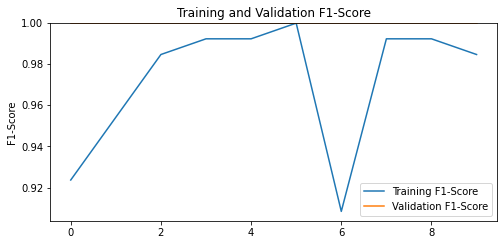

In [15]:
f1 = history_fine.history['accuracy']
val_f1 = history_fine.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(f1, label='Training F1-Score')
plt.plot(val_f1, label='Validation F1-Score')
plt.legend(loc='lower right')
plt.ylabel('F1-Score')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation F1-Score')


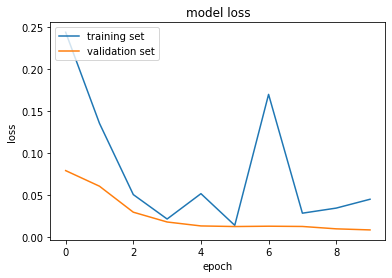

In [16]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper left')
plt.show()

In [17]:
score = model.evaluate(test_generator,batch_size=batch_size) 
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

4/4 [==============================] - 0s 69ms/step - loss: 0.1702 - accuracy: 0.9630 - f1_score: 0.9628
Test loss: 0.17019423842430115 / Test accuracy: 0.9629629850387573


In [18]:
#y_prob = model.predict(test_generator,batch_size=batch_size)
#y_pred = np.argmax(y_prob,axis=1)

y_prob = model.predict(test_generator)
y_pred = np.argmax(y_prob,axis=1)
#print(pred, labels[np.argmax(pred)])
print(classification_report(test_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.31      0.32        13
           1       0.40      0.43      0.41        14

    accuracy                           0.37        27
   macro avg       0.37      0.37      0.37        27
weighted avg       0.37      0.37      0.37        27



In [19]:
y_prob

array([[8.56832266e-01, 1.43167764e-01],
       [1.99640654e-02, 9.80035961e-01],
       [7.84125179e-03, 9.92158771e-01],
       [3.80802230e-04, 9.99619126e-01],
       [1.94271088e-05, 9.99980569e-01],
       [9.99833584e-01, 1.66442056e-04],
       [8.60714987e-02, 9.13928509e-01],
       [1.28911614e-01, 8.71088386e-01],
       [1.35444999e-01, 8.64555001e-01],
       [9.01215896e-03, 9.90987837e-01],
       [9.99907851e-01, 9.21455139e-05],
       [9.97849226e-01, 2.15080194e-03],
       [3.79591614e-01, 6.20408416e-01],
       [9.92500007e-01, 7.49998540e-03],
       [4.00099438e-03, 9.95998979e-01],
       [5.08953631e-03, 9.94910419e-01],
       [9.99571145e-01, 4.28828091e-04],
       [4.87669284e-04, 9.99512315e-01],
       [1.74852293e-02, 9.82514799e-01],
       [9.96747017e-01, 3.25300638e-03],
       [9.98400986e-01, 1.59905932e-03],
       [9.83713269e-01, 1.62867010e-02],
       [9.96876001e-01, 3.12392763e-03],
       [3.69221419e-02, 9.63077784e-01],
       [9.908494

In [20]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [21]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0])

In [22]:
import plotly.figure_factory as ff

y_true = test_generator.classes

z = confusion_matrix(y_true, y_pred)

x = list(test_generator.class_indices.keys())

y = list(test_generator.class_indices.keys())


In [23]:
# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()